In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [7]:
# Load your dataset
df = pd.read_csv('updated_Data_till_T0_2-75_durga_oct17.csv')
df=df[0:10000]
# Shuffle the DataFrame
data = df.sample(frac=1, random_state=42)
# Define input features and target variables
input_features = ['n1', 'l1', 'j1', 'LP', 'Te', 'Z', 'A', 'Rfq', 'T0']
target_variables = ['n2', 'l2', 'j2', 'n3', 'l3', 'j3']

In [8]:
# Split the dataset into input (X) and target (y) variables
X = data[input_features]
y = data[target_variables]

In [9]:
# Sample sizes to consider
train_sizes = np.linspace(0.1, 1.0, 5)  # Use 10 different sample sizes from 10% to 100% of the data

# Initialize the MLPRegressor (replace this with your desired model)
model = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', random_state=42, max_iter=1000, learning_rate='adaptive')

# Prepare data (replace this with your data preprocessing logic)
X, y = df[input_features], df[target_variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, _, y_train, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=ShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    train_sizes=train_sizes, scoring='neg_mean_squared_error')

# Calculate mean squared errors
train_mse = -np.mean(train_scores, axis=1)
test_mse = -np.mean(test_scores, axis=1)


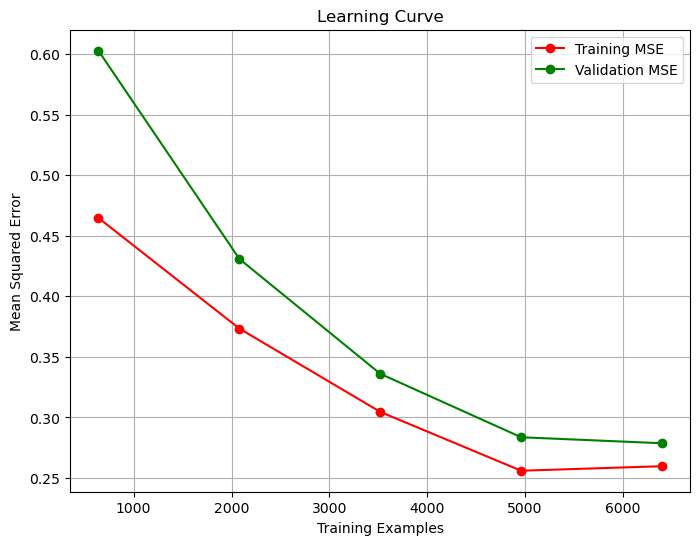

Optimal Data Size for Training: 51200000


In [10]:
# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mse, 'o-', color='r', label='Training MSE')
plt.plot(train_sizes, test_mse, 'o-', color='g', label='Validation MSE')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal data size (where validation MSE is minimum)
optimal_data_size = train_sizes[np.argmin(test_mse)]
print("Optimal Data Size for Training:", int(optimal_data_size * X_train.shape[0]))


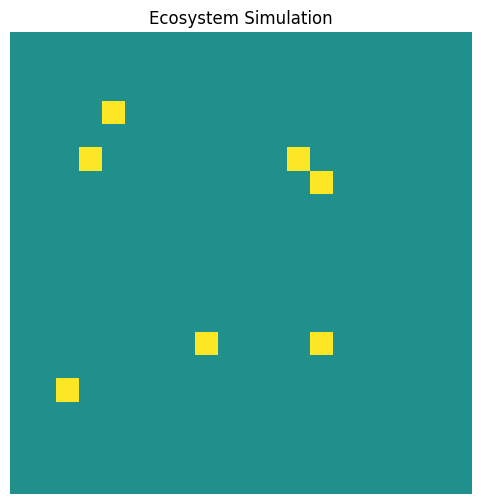

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

# Parameters
GRID_SIZE = 20  # Size of the grid
PLANT_GROWTH_RATE = 0.2  # Probability of plants growing in an empty cell
ANIMAL_MOVE_PROB = 0.5  # Probability of an animal moving
ANIMAL_EAT_PROB = 0.3  # Probability of an animal eating a plant

# Initialize the grid
EMPTY = 0
PLANT = 1
ANIMAL = 2

grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

# Populate grid with initial plants and animals
for _ in range(GRID_SIZE * 2):  # Initial plants
    grid[random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)] = PLANT

for _ in range(GRID_SIZE):  # Initial animals
    grid[random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)] = ANIMAL


def update(frame):
    """Update function for the animation."""
    global grid
    new_grid = grid.copy()

    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if grid[x, y] == EMPTY:
                # Plants can grow in empty spaces
                if random.random() < PLANT_GROWTH_RATE:
                    new_grid[x, y] = PLANT

            elif grid[x, y] == ANIMAL:
                # Animals move or eat plants
                if random.random() < ANIMAL_MOVE_PROB:
                    # Random movement
                    dx, dy = random.choice([(0, 1), (1, 0), (0, -1), (-1, 0)])
                    nx, ny = (x + dx) % GRID_SIZE, (y + dy) % GRID_SIZE
                    if new_grid[nx, ny] == PLANT:
                        # Eat the plant
                        if random.random() < ANIMAL_EAT_PROB:
                            new_grid[nx, ny] = ANIMAL
                            new_grid[x, y] = EMPTY
                    elif new_grid[nx, ny] == EMPTY:
                        # Move to the empty space
                        new_grid[nx, ny] = ANIMAL
                        new_grid[x, y] = EMPTY

    grid = new_grid
    ax.clear()
    ax.imshow(grid, cmap="viridis", vmin=0, vmax=2)
    ax.set_title("Ecosystem Simulation")
    ax.axis("off")


# Create the animation
fig, ax = plt.subplots(figsize=(6, 6))
ani = FuncAnimation(fig, update, frames=200, interval=200)
# plt.show()
ani.save('res.mp4')